In [26]:
# Importing the necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Loading the iris data set

In [2]:
# Loading the data set

a = list(pd.read_csv('data/a_all.data', names = ['data1'])['data1'])
b = list(pd.read_csv('data/b_all.data', names = ['data1'])['data1'])
c = list(pd.read_csv('data/c_all.data', names = ['data1'])['data1'])
d = list(pd.read_csv('data/d_all.data', names = ['data1'])['data1'])
y = list(pd.read_csv('data/iris.data', names = ['data1'])['data1'])

# Organising the data set according to the irises

a_set = a[0:50]
b_set = b[0:50]
c_set = c[0:50]
d_set = d[0:50]
y_set = y[0:50]

a_ver = a[50:100]
b_ver = b[50:100]
c_ver = c[50:100]
d_ver = d[50:100]
y_ver = y[50:100]

a_vir = a[100:]
b_vir = b[100:]
c_vir = c[100:]
d_vir = d[100:]
y_vir = y[100:]

In [3]:
# Changing the values in to numerical labels

y_num_set = list(np.zeros(50).astype(np.int))
y_num_ver = list(np.ones(50).astype(np.int))
y_num_vir = list((np.ones(50)*2).astype(np.int))

## Creating the multiclass perceptron model
### Creating the value and target arrays

In [70]:
# Creating arrays from the target and value lists

x = np.array([a, b, c, d]).T
y = y_num_set + y_num_ver + y_num_vir

# Splitting the data into training and testing data sets

x_split_temp = train_test_split(x, test_size = 0.2, random_state=42)
y_split_temp = train_test_split(y, test_size = 0.2, random_state=42)

x_test = x_split_temp[0]
x_train = x_split_temp[1]

y_test = y_split_temp[0]
y_train = y_split_temp[1]

### Creating the functions

In [71]:
# Calculating the simple perceptron
# M*v multiplicaiton of the target and weight arrays
# Adding the bias to these values

def model(x, weights):
    result = np.dot(x, weights[1:]) + weights[0]
    return result

In [72]:
# Creating a vector for the cost values

cost_list = []

# Multi-class perceptron regularisation

def multiclass_perceptron(alfa, x, yh, weights):        
    
    #getting the results of the perceptron
    all_evals = model(x, weights)
    yc = np.argmax(all_evals, axis = 1)

    #initialising the cost value
    cost = 0
    
    #iterating through the data
    for i in range(0,len(yh)):
        
        # updating the weights
        weights[1:].T[yh[i]] = weights[1:].T[yh[i]] + alfa * x[i]
        weights[1:].T[yc[i]] = weights[1:].T[yc[i]] - alfa * x[i]
        
        # update cost summand
        cost +=  np.max(all_evals[i]) - all_evals[i, y[i]]
        
    # return cost with regularizer added
    cost += alfa*np.linalg.norm(weights,'fro')**2
    cost_list.append(cost/float(len(y)))
    
    return weights

### Generating weights matrix, setting the epochs and learning rate

In [73]:
# Creating random weight and bias matrix

orig_weights = np.random.rand(5,3)

# Setting the epoch number

epochs = 1000

# Setting the learning rate - the regularisation parameter

alfa = 10**-3

### Calling the functions

In [74]:
# Creating accuracy score list

acc_scores = []

# Iterating through n epochs

for i in range(0,epochs):
    
    #calculating the new weights
    weights_new = multiclass_perceptron(alfa, x_train, y_train, orig_weights)
    
    #prediction, saving the data
    y_predicitions = np.argmax(model(x_test, weights_new), axis = 1)
    acc_scores.append(accuracy_score(y_predicitions, y_test))

### Final prediction

In [75]:
# Predicting the results for the model

y_predicitions = np.argmax(model(x_test, weights_new), axis = 1)

# Calculating the accuracy

final_acc = accuracy_score(y_predicitions, y_test)

# Printing the results

print('The final result of the accuracy:', round(final_acc, 3))

The final result of the accuracy: 0.958


# Plotting the results
### Plotting the accuracy vector

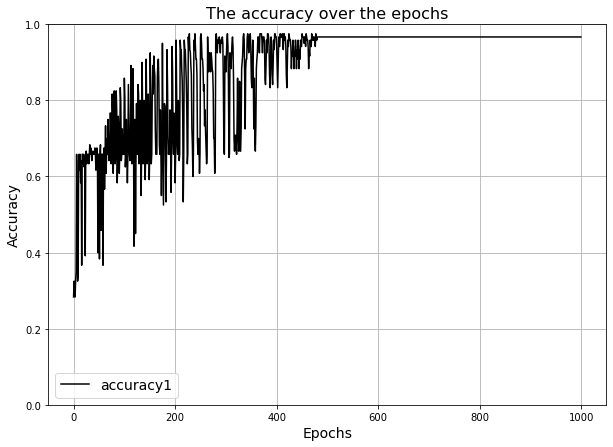

In [69]:
# Creating list for the epochs

epochs_axis = list(range(0,epochs))

# Plotting the accuracy vector

plt.figure(figsize=(10,7))

plt.plot(epochs_axis, acc_scores, color = 'black', label = 'accuracy1')
plt.ylim(0,1)

plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.title('The accuracy over the epochs', fontsize = 16)
plt.legend(fontsize = 14)
plt.grid()

#plt.savefig('diff_acc.PNG', dpi = 600)

plt.show()

### Plotting the cost function

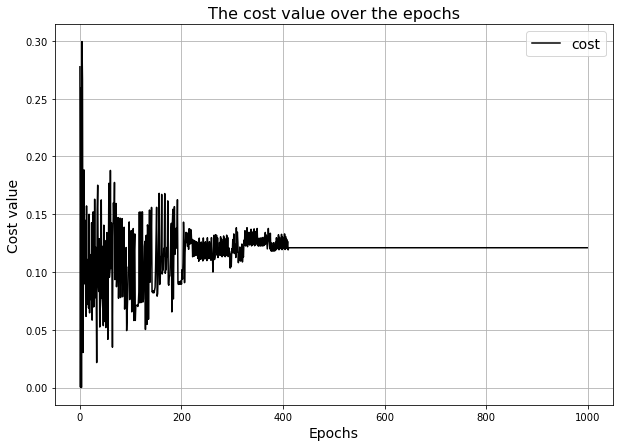

In [78]:
# Creating list for the epochs

epochs_axis = list(range(0,epochs))

# Plotting the accuracy vector

plt.figure(figsize=(10,7))

plt.plot(epochs_axis, cost_list, color = 'black', label = 'cost')

plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Cost value', fontsize = 14)
plt.title('The cost value over the epochs', fontsize = 16)
plt.legend(fontsize = 14)
plt.grid()

#plt.savefig('diff_acc.PNG', dpi = 600)

plt.show()

### Average of plots 

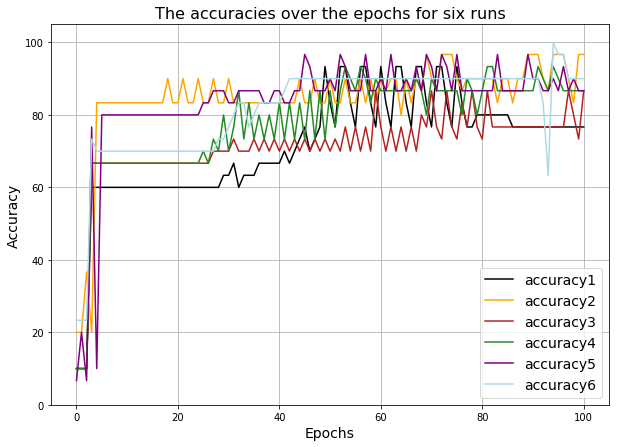

In [45]:
# Reading in the accuracy vector

accuracy1 = list(pd.read_csv('accuracy_vector.txt', names = ['data1'])['data1'])

# Plotting the accuracy vector

plt.figure(figsize=(10,7))

plt.plot(epochs_axis, accuracy1, color = 'black', label = 'accuracy1')

plt.ylim(0,105)

plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.title('The accuracies over the epochs for six runs', fontsize = 16)
plt.legend(fontsize = 14)
plt.grid()

#plt.savefig('diff_acc.PNG', dpi = 600)

plt.show()

## Creating heatmap 